# 项目背景

目标：

通过广告目前的成效数据（花费、安装、营收、cpi、roi、点击率等）以及静态数据（投放地区、app、优化师等），<font color=red> **及时准确**</font>的预测下一阶段广告的成效，然后及时调整预算和广告花费，可以最大限度增加表现良好的广告带来的收益（增效），及时减少表现差的广告带来的损失（止损），大幅度提高的广告投放效果。

具体量化目标：<font color=red> **提升整体收益 5 %**</font>

流程：现阶段将集中于新增广告（用于获取新用户，广告表现为cpi低、roi低）的广告成效预测和调控，后续再运用相似经验至再营销广告（用于已流失用户的二次获取，广告表现为cpi高、roi高）的调控。


    步骤：
    1. 数据分析和明确目标
    2. 原始数据清洗和训练数据集构建
    3. 模型构建与调优
    4. 应用部署与上线

# 1. 数据分析和明确目标

## 1.1 背景分析

### 新增广告的营收和roi随着时间增长的变化关系：

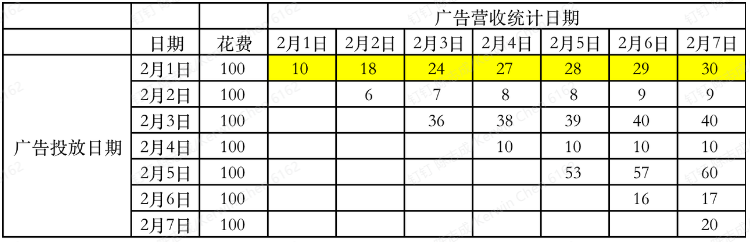

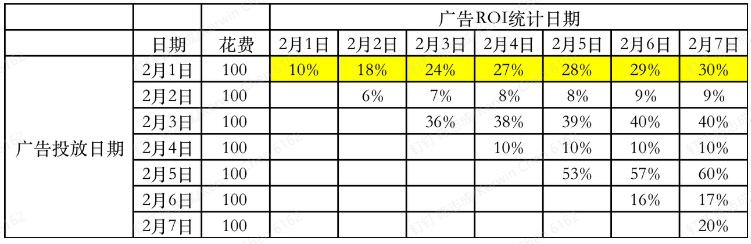

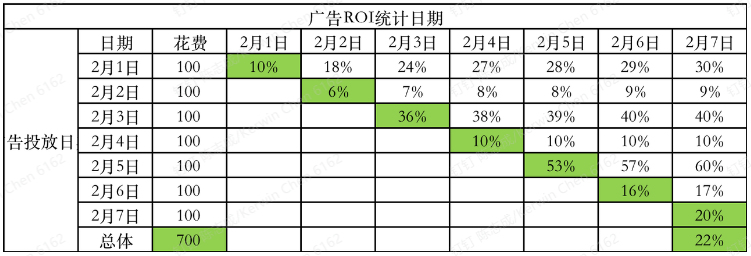

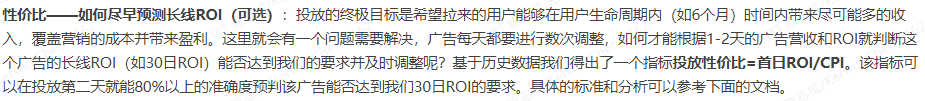

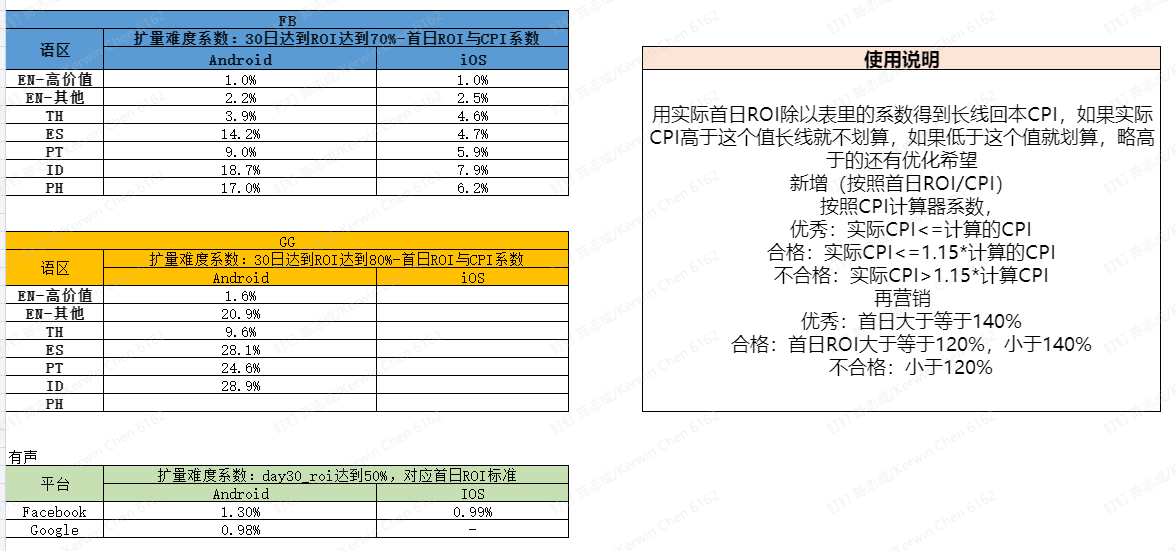

 ###    全部dreame新增广告的首日roi曲线：

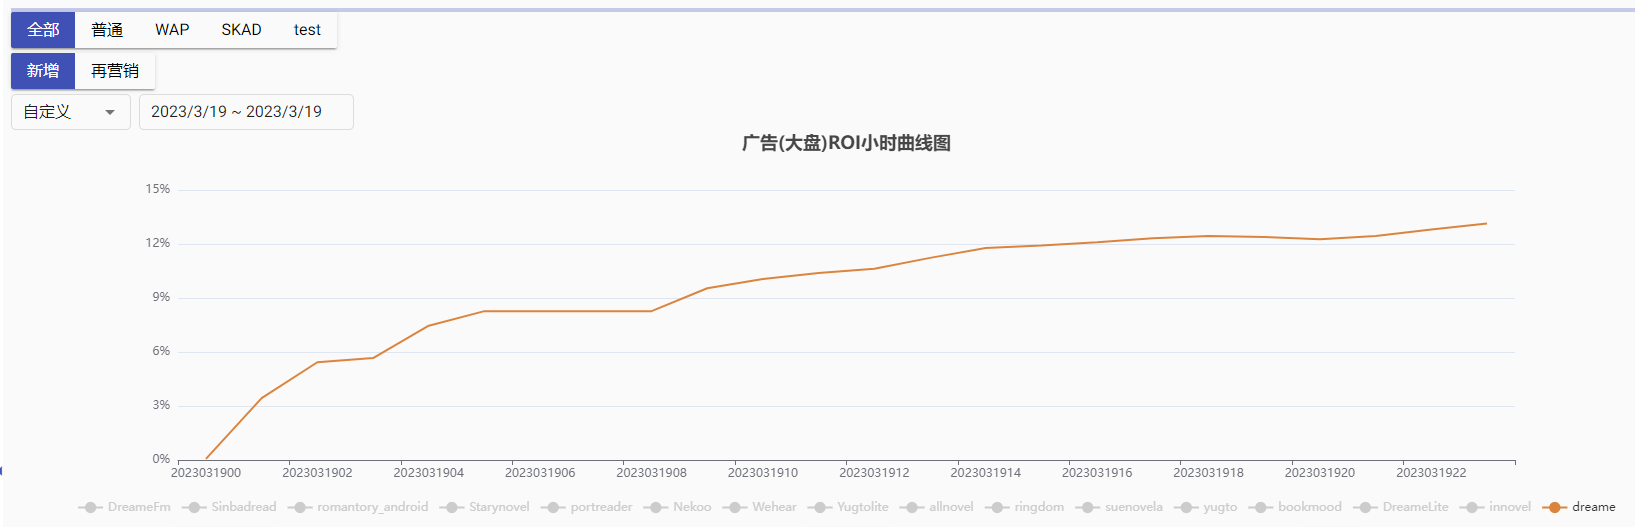

 ###    单条新增广告的首日花费、安装、营收、roi、cpi曲线：

In [173]:
import pandas as pd
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 10))
data = pd.read_csv("C:/Users/Administrator/Desktop/ad.csv", low_memory=False)
data = data[["time","cid","reach","impressions","spend","clicks","omni_app_install","omni_purchase","source","language","creator_code","is_test","pid","country"]]
print(data.head(2))

           time          cid  reach  impressions  spend  clicks  \
0  202303170000  15652899813    NaN          NaN    NaN     NaN   
1  202303170010  15652899813    0.0          0.0    0.0     0.0   

   omni_app_install  omni_purchase  source language creator_code  is_test  \
0               NaN            NaN     NaN      NaN          NaN      NaN   
1               1.0            0.0     1.0       pt      wezonet      0.0   

   pid country  
0  NaN     NaN  
1  1.0      BR  


<Figure size 1152x720 with 0 Axes>

    "time": 时间
    "cid"： 广告id
    "reach": 覆盖人数
    "impressions"：曝光人数
    "spend"：花费
    "clicks"：点击
    "omni_app_install"：安装
    "omni_purchase"：营收
    "source"：新增再营销
    "language"：语种
    "creator_code"：优化师
    "is_test":是否测书
    "pid"：广告投放平台
    "country"：国家

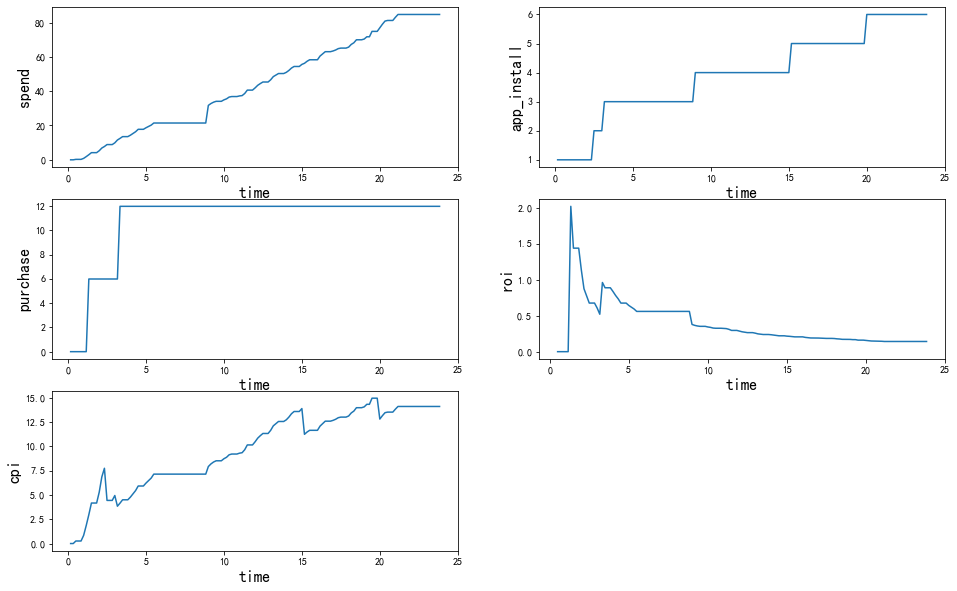

In [148]:
plt.figure(figsize=(16, 10))
data = data[data.cid == 23852418798440667]
data.fillna(method='ffill', inplace=True)
data = data.reset_index(drop="True")
data.index = data.index/6
plt.subplot(321)
plt.ylabel('spend', fontsize=16)
plt.xlabel('time', fontsize=16)
plt.plot(data.index,data[["spend"]])
plt.subplot(322)
plt.ylabel('app_install', fontsize=16)
plt.xlabel('time', fontsize=16)
plt.plot(data.index,data[["omni_app_install"]])
plt.subplot(323)
plt.ylabel('purchase', fontsize=16)
plt.xlabel('time', fontsize=16)
plt.plot(data.index,data[["omni_purchase"]])
plt.subplot(324)
plt.ylabel('roi', fontsize=16)
plt.xlabel('time', fontsize=16)
plt.plot(data.index,data["omni_purchase"]/data["spend"])
plt.subplot(325)
plt.ylabel('cpi', fontsize=16)
plt.xlabel('time', fontsize=16)
plt.plot(data.index,data["spend"]/data["omni_app_install"])
plt.show()

 ###    单条正常新增广告的每日花费、安装、营收、roi、cpi曲线：

<Figure size 1152x720 with 0 Axes>

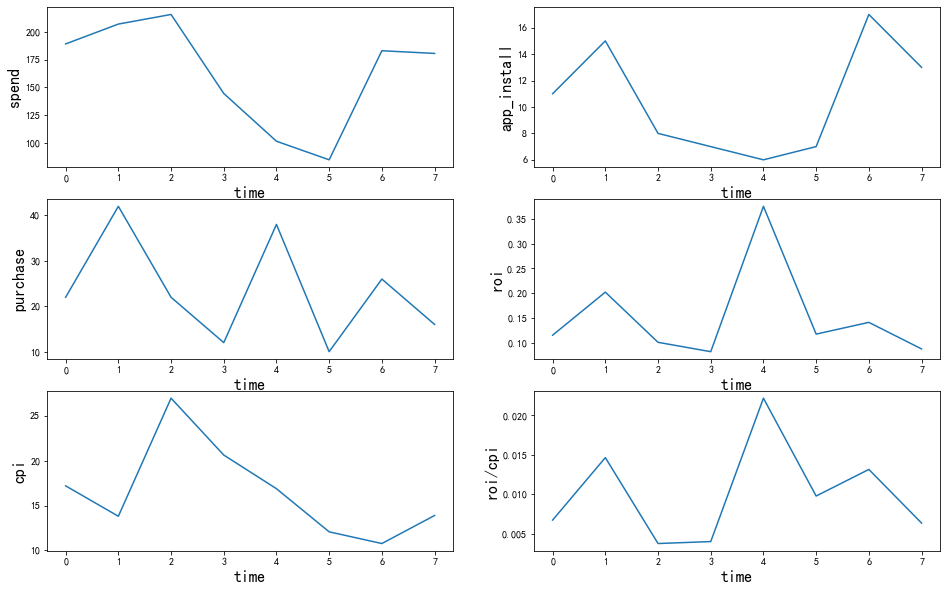

In [233]:
plt.figure(figsize=(16, 10))
data = df[df.cid == '23852254449660704+']
# print(df[df.roi_day_flag_sum == max(df.roi_day_flag_sum)])
# print(df[df.roi_day_flag_sum == max(df.23852779051020499)])
plt.figure(figsize=(16, 10))
data = data.reset_index(drop="True")
data.index = data.index
plt.subplot(321)
plt.ylabel('spend', fontsize=16)
plt.xlabel('time', fontsize=16)
plt.plot(data.index,data[["spend_day"]])
plt.subplot(322)
plt.ylabel('app_install', fontsize=16)
plt.xlabel('time', fontsize=16)
plt.plot(data.index,data[["omni_app_install_day"]])
plt.subplot(323)
plt.ylabel('purchase', fontsize=16)
plt.xlabel('time', fontsize=16)
plt.plot(data.index,data[["omni_purchase_day"]])
plt.subplot(324)
plt.ylabel('roi', fontsize=16)
plt.xlabel('time', fontsize=16)
plt.plot(data.index,data["omni_purchase_day"]/data["spend_day"])
plt.subplot(325)
plt.ylabel('cpi', fontsize=16)
plt.xlabel('time', fontsize=16)
plt.plot(data.index,data["spend_day"]/data["omni_app_install_day"])
plt.subplot(326)
plt.ylabel('roi/cpi', fontsize=16)
plt.xlabel('time', fontsize=16)
plt.plot(data.index,(data["omni_purchase_day"]/data["spend_day"])/(data["spend_day"]/data["omni_app_install_day"]))
plt.show()

 ###    可以止损广告的首日花费、安装、营收、roi、cpi曲线：

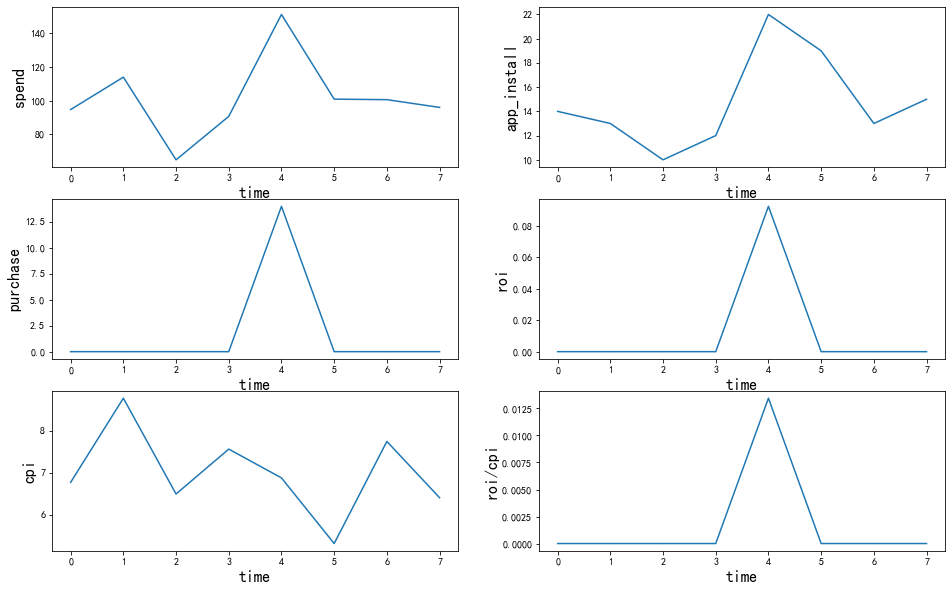

In [234]:
df = pd.read_csv("C:/Users/Administrator/Desktop/result.csv", low_memory=False)
sub_df = df.loc[df.is_test == 0]
df = df.loc[df.cid.isin(sub_df['cid'])]
df = df[df.language == 'en']
df['roi_day_flag'] = df['roi_day'].apply(lambda x: 1 if x > 0.05 and x < 0.15  else 0 )
df['roi_day_flag_sum'] = df.groupby(['cid'])['roi_day_flag'].transform('sum')
df['omni_purchase_day_sum'] = df.groupby(['cid'])['omni_purchase_day'].transform('sum')
df = df[df.omni_purchase_day_sum > 0]
data = df[df.cid == '19686382231+']
num = max(df.roi_day_flag_sum)
# print(df[df.roi_day_flag_sum == num-2])
# print(df[df.roi_day_flag_sum == max(df.23852779051020499)])
plt.figure(figsize=(16, 10))
data = data.reset_index(drop="True")
data.index = data.index
plt.subplot(321)
plt.ylabel('spend', fontsize=16)
plt.xlabel('time', fontsize=16)
plt.plot(data.index,data[["spend_day"]])
plt.subplot(322)
plt.ylabel('app_install', fontsize=16)
plt.xlabel('time', fontsize=16)
plt.plot(data.index,data[["omni_app_install_day"]])
plt.subplot(323)
plt.ylabel('purchase', fontsize=16)
plt.xlabel('time', fontsize=16)
plt.plot(data.index,data[["omni_purchase_day"]])
plt.subplot(324)
plt.ylabel('roi', fontsize=16)
plt.xlabel('time', fontsize=16)
plt.plot(data.index,data["omni_purchase_day"]/data["spend_day"])
plt.subplot(325)
plt.ylabel('cpi', fontsize=16)
plt.xlabel('time', fontsize=16)
plt.plot(data.index,data["spend_day"]/data["omni_app_install_day"])
plt.subplot(326)
plt.ylabel('roi/cpi', fontsize=16)
plt.xlabel('time', fontsize=16)
plt.plot(data.index,(data["omni_purchase_day"]/data["spend_day"])/(data["spend_day"]/data["omni_app_install_day"]))
plt.show()

    总结：
    1. 首日roi、cpi指标是衡量广告好坏的重要指标
    2. 首日roi指标由于广告当日的安装和营收很少，具有很大的不确定性，使得后续模型的学习具有很大的难度

##    1.2 数据初探

In [150]:
import numpy as np
import pandas as pd
import warnings
import copy
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

df = pd.read_csv("C:/Users/Administrator/Desktop/result.csv", low_memory=False)
# df = df.loc[df.day_of_year <= 20230319][df.day_of_year >= 20230317]
df = df.loc[df.day_of_year == 20230319]

### 1.2.1 全部广告条数、花费、营收、安装等

In [151]:
sub_df = copy.deepcopy(df)
sub_df['cid_count'] = sub_df.groupby(['day_of_year'])['cid'].transform('count')
sub_df['spend_day_sum'] = sub_df.groupby(['day_of_year'])['spend_day'].transform('sum')
sub_df['app_install_day_sum'] = sub_df.groupby(['day_of_year'])['omni_app_install_day'].transform('sum')
sub_df['purchase_day_sum'] = sub_df.groupby(['day_of_year'])['omni_purchase_day'].transform('sum')
sub_df['roi_day']  = sub_df['purchase_day_sum']/ sub_df['spend_day_sum']
sub_df['cpi_day']  = sub_df['spend_day_sum']/ sub_df['app_install_day_sum']
sub_df['spend_mean']  = sub_df['spend_day_sum']/ sub_df['cid_count']
sub_df['app_install_mean']  = sub_df['app_install_day_sum']/ sub_df['cid_count']
sub_df.sort_values(["day_of_year"], ascending=True, inplace=True)
sub_df.drop_duplicates(subset=['day_of_year'], keep='last', inplace=True)
sub_df[['day_of_year', 'cid_count', 'spend_day_sum', 'spend_mean', 'app_install_day_sum', 'app_install_mean', 'purchase_day_sum', 'roi_day', 'cpi_day']].reset_index(drop="True")

,day_of_year,cid_count,spend_day_sum,spend_mean,app_install_day_sum,app_install_mean,purchase_day_sum,roi_day,cpi_day
0,20230319,1083,54226.55,50.070683,16315.0,15.064635,6207.35,0.114471,3.323724


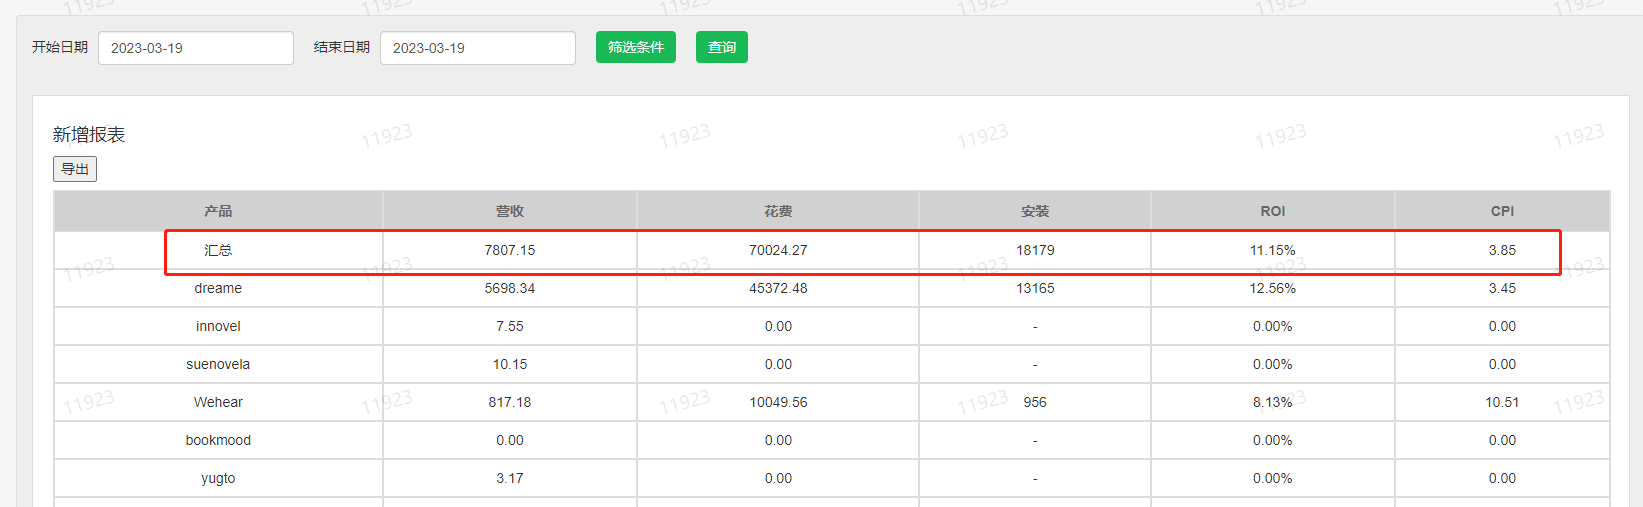

    20230309 同步的新增广告占比全平台的 77%

### 测书

In [89]:
sub_df = copy.deepcopy(df)
sub_df = sub_df[sub_df.is_test == 1]
sub_df['cid_count'] = sub_df.groupby(['day_of_year'])['cid'].transform('count')
sub_df['spend_day_sum'] = sub_df.groupby(['day_of_year'])['spend_day'].transform('sum')
sub_df['app_install_day_sum'] = sub_df.groupby(['day_of_year'])['omni_app_install_day'].transform('sum')
sub_df['purchase_day_sum'] = sub_df.groupby(['day_of_year'])['omni_purchase_day'].transform('sum')
sub_df['roi_day']  = sub_df['purchase_day_sum']/ sub_df['spend_day_sum']
sub_df['cpi_day']  = sub_df['spend_day_sum']/ sub_df['app_install_day_sum']
sub_df['spend_mean']  = sub_df['spend_day_sum']/ sub_df['cid_count']
sub_df['app_install_mean']  = sub_df['app_install_day_sum']/ sub_df['cid_count']
sub_df.sort_values(["day_of_year"], ascending=True, inplace=True)
sub_df.drop_duplicates(subset=['day_of_year'], keep='last', inplace=True)
sub_df[['day_of_year', 'cid_count', 'spend_day_sum', 'spend_mean', 'app_install_day_sum', 'app_install_mean', 'purchase_day_sum', 'roi_day', 'cpi_day']].reset_index(drop="True")

,day_of_year,cid_count,spend_day_sum,spend_mean,app_install_day_sum,app_install_mean,purchase_day_sum,roi_day,cpi_day
0,20230319,122,4397.98,36.049016,700.0,5.737705,340.62,0.077449,6.282829


    测书花费占比 8.3%，广告条数占比 11.2%

In [152]:
sub_df = copy.deepcopy(df)
sub_df = sub_df[sub_df.is_test == 1]
df = df[df.is_test == 0]
sub_df['cid_lang_count'] = sub_df.groupby(['language', 'day_of_year'])['cid'].transform('count')
sub_df['spend_day_sum'] = sub_df.groupby(['language', 'day_of_year'])['spend_day'].transform('sum')
sub_df['app_install_day_sum'] = sub_df.groupby(['language', 'day_of_year'])['omni_app_install_day'].transform('sum')
sub_df['purchase_day_sum'] = sub_df.groupby(['language', 'day_of_year'])['omni_purchase_day'].transform('sum')
sub_df['roi_day']  = sub_df['purchase_day_sum']/ sub_df['spend_day_sum']
sub_df['cpi_day']  = sub_df['spend_day_sum']/ sub_df['app_install_day_sum']
sub_df['spend_mean']  = sub_df['spend_day_sum']/ sub_df['cid_lang_count']
sub_df['app_install_mean']  = sub_df['app_install_day_sum']/ sub_df['cid_lang_count']
sub_df['language_day_of_year'] = sub_df['language'] + sub_df['day_of_year'].astype(str)
sub_df.sort_values(['language_day_of_year'], ascending=True, inplace=True)
sub_df.drop_duplicates(subset=['language_day_of_year'], keep='last', inplace=True)
sub_df = sub_df[['language', 'day_of_year', 'cid_lang_count', 'spend_day_sum', 'spend_mean', 'app_install_day_sum', 'app_install_mean','purchase_day_sum', 'roi_day', 'cpi_day']].reset_index(drop="True")
sub_df.dropna(inplace=True)
sub_df['cid_lang_count'] = sub_df['cid_lang_count'].astype(int)
sub_df

,language,day_of_year,cid_lang_count,spend_day_sum,spend_mean,app_install_day_sum,app_install_mean,purchase_day_sum,roi_day,cpi_day
0,en,20230319,75,3517.03,46.893733,180.0,2.400000,281.72,0.080102,19.539056
1,es,20230319,9,107.65,11.961111,88.0,9.777778,5.97,0.055458,1.223295
2,id,20230319,14,222.24,15.874286,138.0,9.857143,8.36,0.037617,1.610435
3,ph,20230319,4,34.08,8.520000,41.0,10.250000,0.39,0.011444,0.831220
4,pt,20230319,1,17.83,17.830000,22.0,22.000000,0.00,0.000000,0.810455
5,th,20230319,9,338.67,37.630000,76.0,8.444444,41.80,0.123424,4.456184
6,tr,20230319,6,89.02,14.836667,82.0,13.666667,0.00,0.000000,1.085610


    英语区测书广告数占比 60%，其余语区占比 40%

### 1.2.2 全部广告条数、花费、营收、安装等（除去测书）

In [83]:
sub_df = copy.deepcopy(df)
sub_df['cid_count'] = sub_df.groupby(['day_of_year'])['cid'].transform('count')
sub_df['spend_day_sum'] = sub_df.groupby(['day_of_year'])['spend_day'].transform('sum')
sub_df['app_install_day_sum'] = sub_df.groupby(['day_of_year'])['omni_app_install_day'].transform('sum')
sub_df['purchase_day_sum'] = sub_df.groupby(['day_of_year'])['omni_purchase_day'].transform('sum')
sub_df['roi_day']  = sub_df['purchase_day_sum']/ sub_df['spend_day_sum']
sub_df['cpi_day']  = sub_df['spend_day_sum']/ sub_df['app_install_day_sum']
sub_df['spend_mean']  = sub_df['spend_day_sum']/ sub_df['cid_count']
sub_df['app_install_mean']  = sub_df['app_install_day_sum']/ sub_df['cid_count']
sub_df.sort_values(["day_of_year"], ascending=True, inplace=True)
sub_df.drop_duplicates(subset=['day_of_year'], keep='last', inplace=True)
sub_df[['day_of_year', 'cid_count', 'spend_day_sum', 'spend_mean', 'app_install_day_sum', 'app_install_mean', 'purchase_day_sum', 'roi_day', 'cpi_day']].reset_index(drop="True")

,day_of_year,cid_count,spend_day_sum,spend_mean,app_install_day_sum,app_install_mean,purchase_day_sum,roi_day,cpi_day
0,20230319,961,49828.57,51.850749,15615.0,16.248699,5866.73,0.117738,3.191071


### 1.2.3  新建广告的条数、花费、营收、安装等

In [156]:
sub_df = copy.deepcopy(df)
sub_df = sub_df[(sub_df.is_test == 0) & (~(sub_df.spend_3_days > 0)]
sub_df['cid_count'] = sub_df.groupby(['day_of_year'])['cid'].transform('count')
sub_df['spend_day_sum'] = sub_df.groupby(['day_of_year'])['spend_day'].transform('sum')
sub_df['app_install_day_sum'] = sub_df.groupby(['day_of_year'])['omni_app_install_day'].transform('sum')
sub_df['purchase_day_sum'] = sub_df.groupby(['day_of_year'])['omni_purchase_day'].transform('sum')
sub_df['roi_day']  = sub_df['purchase_day_sum']/ sub_df['spend_day_sum']
sub_df['cpi_day']  = sub_df['spend_day_sum']/ sub_df['app_install_day_sum']
sub_df['spend_mean']  = sub_df['spend_day_sum']/ sub_df['cid_count']
sub_df['app_install_mean']  = sub_df['app_install_day_sum']/ sub_df['cid_count']
sub_df.sort_values(["day_of_year"], ascending=True, inplace=True)
sub_df.drop_duplicates(subset=['day_of_year'], keep='last', inplace=True)
sub_df[['day_of_year', 'cid_count', 'spend_day_sum', 'spend_mean', 'app_install_day_sum','app_install_mean', 'purchase_day_sum', 'roi_day', 'cpi_day']].reset_index(drop="True")

,day_of_year,cid_count,spend_day_sum,spend_mean,app_install_day_sum,app_install_mean,purchase_day_sum,roi_day,cpi_day
0,20230319,254,7560.85,29.767126,1148.0,4.519685,873.77,0.115565,6.586106


    新建的广告数占全部广告（除去测书）有26.4%， 花费占比 15%

In [158]:
sub_df = copy.deepcopy(df)
sub_df = sub_df[(sub_df.is_test == 0) & (~(sub_df.spend_3_days > 0))]
sub_df['cid_lang_count'] = sub_df.groupby(['language', 'day_of_year'])['cid'].transform('count')
sub_df['spend_day_sum'] = sub_df.groupby(['language', 'day_of_year'])['spend_day'].transform('sum')
sub_df['app_install_day_sum'] = sub_df.groupby(['language', 'day_of_year'])['omni_app_install_day'].transform('sum')
sub_df['purchase_day_sum'] = sub_df.groupby(['language', 'day_of_year'])['omni_purchase_day'].transform('sum')
sub_df['roi_day']  = sub_df['purchase_day_sum']/ sub_df['spend_day_sum']
sub_df['cpi_day']  = sub_df['spend_day_sum']/ sub_df['app_install_day_sum']
sub_df['spend_mean']  = sub_df['spend_day_sum']/ sub_df['cid_lang_count']
sub_df['app_install_mean']  = sub_df['app_install_day_sum']/ sub_df['cid_lang_count']
sub_df['language_day_of_year'] = sub_df['language'] + sub_df['day_of_year'].astype(str)
sub_df.sort_values(['language_day_of_year'], ascending=True, inplace=True)
sub_df.drop_duplicates(subset=['language_day_of_year'], keep='last', inplace=True)
sub_df = sub_df[['language', 'day_of_year', 'cid_lang_count', 'spend_day_sum', 'spend_mean', 'app_install_day_sum', 'app_install_mean','purchase_day_sum', 'roi_day', 'cpi_day']].reset_index(drop="True")
sub_df.dropna(inplace=True)
sub_df['cid_lang_count'] = sub_df['cid_lang_count'].astype(int)
sub_df

,language,day_of_year,cid_lang_count,spend_day_sum,spend_mean,app_install_day_sum,app_install_mean,purchase_day_sum,roi_day,cpi_day
0,en,20230319,148,5697.82,38.498784,519.0,3.506757,709.54,0.124528,10.978459
1,es,20230319,28,396.87,14.173929,184.0,6.571429,26.91,0.067806,2.156902
2,id,20230319,2,52.76,26.380000,32.0,16.000000,4.26,0.080743,1.648750
3,ph,20230319,6,86.16,14.360000,77.0,12.833333,5.35,0.062094,1.118961
4,pt,20230319,17,132.53,7.795882,60.0,3.529412,2.98,0.022485,2.208833
5,th,20230319,51,1168.41,22.910000,249.0,4.882353,121.56,0.104039,4.692410


### 1.2.4 存量广告的条数、花费、营收、安装等

In [159]:
sub_df = copy.deepcopy(df)
sub_df = sub_df[sub_df.is_test == 0]
sub_df = sub_df[sub_df.spend_3_days > 0]
sub_df['cid_count'] = sub_df.groupby(['day_of_year'])['cid'].transform('count')
sub_df['spend_day_sum'] = sub_df.groupby(['day_of_year'])['spend_day'].transform('sum')
sub_df['app_install_day_sum'] = sub_df.groupby(['day_of_year'])['omni_app_install_day'].transform('sum')
sub_df['purchase_day_sum'] = sub_df.groupby(['day_of_year'])['omni_purchase_day'].transform('sum')
sub_df['roi_day']  = sub_df['purchase_day_sum']/ sub_df['spend_day_sum']
sub_df['cpi_day']  = sub_df['spend_day_sum']/ sub_df['app_install_day_sum']
sub_df.sort_values(["day_of_year"], ascending=True, inplace=True)
sub_df.drop_duplicates(subset=['day_of_year'], keep='last', inplace=True)
sub_df[['day_of_year', 'cid_count', 'spend_day_sum', 'app_install_day_sum', 'purchase_day_sum', 'roi_day', 'cpi_day']].reset_index(drop="True")

,day_of_year,cid_count,spend_day_sum,app_install_day_sum,purchase_day_sum,roi_day,cpi_day
0,20230319,707,42267.72,14467.0,4992.96,0.118127,2.921664


    存量的广告数占全部广告（除去测书）有75%， 花费占比 85%

### 存量广告分语种

In [160]:
sub_df = copy.deepcopy(df)
sub_df = sub_df[sub_df.is_test == 0]
sub_df = sub_df[(sub_df.spend_3_days > 0)]
sub_df['cid_lang_count'] = sub_df.groupby(['language', 'day_of_year'])['cid'].transform('count')
sub_df['spend_day_sum'] = sub_df.groupby(['language', 'day_of_year'])['spend_day'].transform('sum')
sub_df['app_install_day_sum'] = sub_df.groupby(['language', 'day_of_year'])['omni_app_install_day'].transform('sum')
sub_df['purchase_day_sum'] = sub_df.groupby(['language', 'day_of_year'])['omni_purchase_day'].transform('sum')
sub_df['roi_day']  = sub_df['purchase_day_sum']/ sub_df['spend_day_sum']
sub_df['cpi_day']  = sub_df['spend_day_sum']/ sub_df['app_install_day_sum']
sub_df['spend_mean']  = sub_df['spend_day_sum']/ sub_df['cid_lang_count']
sub_df['app_install_mean']  = sub_df['app_install_day_sum']/ sub_df['cid_lang_count']
sub_df['language_day_of_year'] = sub_df['language'] + sub_df['day_of_year'].astype(str)
sub_df.sort_values(['language_day_of_year'], ascending=True, inplace=True)
sub_df.drop_duplicates(subset=['language_day_of_year'], keep='last', inplace=True)
sub_df = sub_df[['language', 'day_of_year', 'cid_lang_count', 'spend_day_sum', 'spend_mean', 'app_install_day_sum', 'app_install_mean','purchase_day_sum', 'roi_day', 'cpi_day']].reset_index(drop="True")
sub_df.dropna(inplace=True)
sub_df['cid_lang_count'] = sub_df['cid_lang_count'].astype(int)
sub_df

,language,day_of_year,cid_lang_count,spend_day_sum,spend_mean,app_install_day_sum,app_install_mean,purchase_day_sum,roi_day,cpi_day
0,en,20230319,394,31286.05,79.406218,3482.0,8.837563,3830.00,0.122419,8.985080
1,es,20230319,71,3863.45,54.414789,4187.0,58.971831,449.26,0.116285,0.922725
2,id,20230319,88,1802.61,20.484205,1397.0,15.875000,214.50,0.118994,1.290344
3,ph,20230319,16,533.37,33.335625,402.0,25.125000,62.46,0.117104,1.326791
4,pt,20230319,12,916.40,76.366667,969.0,80.750000,112.62,0.122894,0.945717
5,th,20230319,65,2315.40,35.621538,916.0,14.092308,234.76,0.101391,2.527729
6,tr,20230319,17,422.76,24.868235,542.0,31.882353,70.52,0.166809,0.780000
7,vn,20230319,26,802.81,30.877308,2257.0,86.807692,0.00,0.000000,0.355698


    英语区存量广告花费占比75%，其余语种占比25%

### 存量广告（英语）分roi区间：

In [172]:
sub_df = copy.deepcopy(df)
sub_df = sub_df[sub_df.is_test == 0]
sub_df = sub_df[sub_df.language == 'en']
sub_df = sub_df[(sub_df.spend_3_days > 0)]
sub_df['roi_group'] = sub_df['roi_day'].apply(lambda x: "0 - 5 % " if x < 0.05 else ( "5  - 10 %" if x < 0.1  else ( "10 - 15 %" if x < 0.15  else "15 % +" ) ))
sub_df['roi_group_index'] = sub_df['roi_day'].apply(lambda x: 0 if x < 0.05 else ( 1 if x < 0.1  else ( 2 if x < 0.15  else 3 ) ))
sub_df['cid_lang_count'] = sub_df.groupby(['roi_group', 'day_of_year'])['cid'].transform('count')
sub_df['spend_day_sum'] = sub_df.groupby(['roi_group', 'day_of_year'])['spend_day'].transform('sum')
sub_df['app_install_day_sum'] = sub_df.groupby(['roi_group', 'day_of_year'])['omni_app_install_day'].transform('sum')
sub_df['purchase_day_sum'] = sub_df.groupby(['roi_group', 'day_of_year'])['omni_purchase_day'].transform('sum')
sub_df['roi_day']  = sub_df['purchase_day_sum']/ sub_df['spend_day_sum']
sub_df['cpi_day']  = sub_df['spend_day_sum']/ sub_df['app_install_day_sum']
sub_df['spend_mean']  = sub_df['spend_day_sum']/ sub_df['cid_lang_count']
sub_df['app_install_mean']  = sub_df['app_install_day_sum']/ sub_df['cid_lang_count']
sub_df['roi_group_day_of_year'] = sub_df['roi_group_index'].astype(str) + sub_df['day_of_year'].astype(str)
sub_df.sort_values(['roi_group_day_of_year'], ascending=True, inplace=True)
sub_df.drop_duplicates(subset=['roi_group_day_of_year'], keep='last', inplace=True)
sub_df = sub_df[['day_of_year', 'roi_group', 'cid_lang_count', 'spend_day_sum', 'spend_mean', 'app_install_day_sum', 'app_install_mean','purchase_day_sum', 'roi_day', 'cpi_day']].reset_index(drop="True")
sub_df.dropna(inplace=True)
sub_df['cid_lang_count'] = sub_df['cid_lang_count'].astype(int)
sub_df

,day_of_year,roi_group,cid_lang_count,spend_day_sum,spend_mean,app_install_day_sum,app_install_mean,purchase_day_sum,roi_day,cpi_day
0,20230319,0 - 5 %,220,11686.93,53.122409,1249.0,5.677273,71.91,0.006153,9.357030
1,20230319,5 - 10 %,32,5057.05,158.032813,573.0,17.906250,384.86,0.076104,8.825567
2,20230319,10 - 15 %,30,3742.88,124.762667,334.0,11.133333,477.32,0.127527,11.206228
3,20230319,15 % +,112,10799.19,96.421339,1326.0,11.839286,2895.91,0.268160,8.144186


    英语存量广告分析结果：
    1. 英语存量广告的数据分布呈现两头分布，roi 小于 5 %的 广告和roi 高于 15 %的 广告占比达到85 %以上，中间roi 大于 5 %，小于 15 %的 广告的占比不如15 %；
    2. 在所有存量广告中，roi 小于 5 %的 广告占据近 60% 的广告条数，同时占据了35%以上的广告花费，同时几乎无法贡献营收；
    3. 在所有存量广告中，roi 高于 15 %的 广告占据近 30% 的广告花费贡献了近80%的营收；

### 存量广告（英语）分roi区间、花费区间：

In [77]:
sub_df = copy.deepcopy(df)
sub_df = sub_df[sub_df.is_test == 0]
sub_df = sub_df[sub_df.language == 'en']
sub_df = sub_df[(sub_df.spend_3_days > 0)]
sub_df['roi_group'] = sub_df['roi_day'].apply(lambda x: "0 - 5 % " if x < 0.05 else ( "5  - 10 %" if x < 0.1  else ( "10 - 15 %" if x < 0.15  else "15 % +" ) ))
sub_df['roi_group_index'] = sub_df['roi_day'].apply(lambda x: 0 if x < 0.05 else ( 1 if x < 0.1  else ( 2 if x < 0.15  else 3 ) ))
sub_df['spend_group'] = sub_df['spend_day'].apply(lambda x: "0 - 50 " if x < 50 else ( "50 - 100" if x < 100  else ( "100 - 200" if x < 200  else "200 +" ) ))
sub_df['spend_group_index'] = sub_df['spend_day'].apply(lambda x: 0 if x < 50 else ( 1 if x < 100  else (2 if x < 200  else 3 ) ))
sub_df['cid_lang_count'] = sub_df.groupby(['roi_group', 'spend_group', 'day_of_year'])['cid'].transform('count')
sub_df['spend_sum'] = sub_df.groupby(['roi_group', 'spend_group', 'day_of_year'])['spend_day'].transform('sum')
sub_df['app_install_sum'] = sub_df.groupby(['roi_group', 'spend_group', 'day_of_year'])['omni_app_install_day'].transform('sum')
sub_df['purchase_sum'] = sub_df.groupby(['roi_group', 'spend_group', 'day_of_year'])['omni_purchase_day'].transform('sum')
sub_df['roi_day']  = sub_df['purchase_sum']/ sub_df['spend_sum']
sub_df['cpi_day']  = sub_df['spend_sum']/ sub_df['app_install_sum']
sub_df['spend_mean']  = sub_df['spend_sum']/ sub_df['cid_lang_count']
sub_df['app_install_mean']  = sub_df['app_install_sum']/ sub_df['cid_lang_count']
sub_df['roi_group_day_of_year'] = sub_df['roi_group_index'].astype(str) + sub_df['spend_group_index'].astype(str) + sub_df['day_of_year'].astype(str)
sub_df.sort_values(['roi_group_day_of_year'], ascending=True, inplace=True)
sub_df.drop_duplicates(subset=['roi_group_day_of_year'], keep='last', inplace=True)
sub_df = sub_df[['day_of_year', 'roi_group', 'spend_group', 'cid_lang_count', 'spend_sum', 'spend_mean', 'app_install_sum', 'app_install_mean','purchase_sum', 'roi_day', 'cpi_day']].reset_index(drop="True")
sub_df.dropna(inplace=True)
sub_df['cid_lang_count'] = sub_df['cid_lang_count'].astype(int)
sub_df

,day_of_year,roi_group,spend_group,cid_lang_count,spend_sum,spend_mean,app_install_sum,app_install_mean,purchase_sum,roi_day,cpi_day
0,20230319,0 - 5 %,0 - 50,183,5275.58,28.828306,472.0,2.579235,1.99,0.000377,11.177076
1,20230319,0 - 5 %,50 - 100,61,3942.98,64.639016,507.0,8.311475,4.97,0.001260,7.777081
2,20230319,0 - 5 %,100 - 200,20,2631.33,131.566500,182.0,9.100000,18.05,0.006860,14.457857
3,20230319,0 - 5 %,200 +,8,2131.00,266.375000,201.0,25.125000,49.89,0.023412,10.601990
4,20230319,5 - 10 %,0 - 50,7,285.54,40.791429,124.0,17.714286,24.38,0.085382,2.302742
5,20230319,5 - 10 %,50 - 100,7,491.60,70.228571,48.0,6.857143,37.92,0.077136,10.241667
6,20230319,5 - 10 %,100 - 200,14,2107.82,150.558571,158.0,11.285714,159.78,0.075803,13.340633
7,20230319,5 - 10 %,200 +,6,2275.73,379.288333,249.0,41.500000,171.74,0.075466,9.139478
8,20230319,10 - 15 %,0 - 50,8,352.20,44.025000,36.0,4.500000,45.90,0.130324,9.783333
9,20230319,10 - 15 %,50 - 100,9,625.02,69.446667,91.0,10.111111,75.88,0.121404,6.868352


     英语存量广告分析结果：：
        4. 在所有存量广告中，roi 低于 5 %的 广告，花费超过50也有将近9000，但是营收很少，因此这部分是止损的重点。

### 存量广告（非英语）分roi区间：

In [167]:
sub_df = copy.deepcopy(df)
sub_df = sub_df[sub_df.is_test == 0]
sub_df = sub_df[sub_df.language != 'en']
sub_df = sub_df[(sub_df.spend_3_days > 0)]
sub_df['roi_group'] = sub_df['roi_day'].apply(lambda x: "0 - 5 % " if x < 0.05 else ( "5  - 10 %" if x < 0.1  else ( "10 - 15 %" if x < 0.15  else "15 % +" ) ))
sub_df['roi_group_index'] = sub_df['roi_day'].apply(lambda x: 0 if x < 0.05 else ( 1 if x < 0.1  else ( 2 if x < 0.15  else 3 ) ))
sub_df['cid_lang_count'] = sub_df.groupby(['roi_group', 'day_of_year'])['cid'].transform('count')
sub_df['spend_day_sum'] = sub_df.groupby(['roi_group', 'day_of_year'])['spend_day'].transform('sum')
sub_df['app_install_day_sum'] = sub_df.groupby(['roi_group', 'day_of_year'])['omni_app_install_day'].transform('sum')
sub_df['purchase_day_sum'] = sub_df.groupby(['roi_group', 'day_of_year'])['omni_purchase_day'].transform('sum')
sub_df['roi_day']  = sub_df['purchase_day_sum']/ sub_df['spend_day_sum']
sub_df['cpi_day']  = sub_df['spend_day_sum']/ sub_df['app_install_day_sum']
sub_df['spend_mean']  = sub_df['spend_day_sum']/ sub_df['cid_lang_count']
sub_df['app_install_mean']  = sub_df['app_install_day_sum']/ sub_df['cid_lang_count']
sub_df['roi_group_day_of_year'] = sub_df['roi_group_index'].astype(str) + sub_df['day_of_year'].astype(str)
sub_df.sort_values(['roi_group_day_of_year'], ascending=True, inplace=True)
sub_df.drop_duplicates(subset=['roi_group_day_of_year'], keep='last', inplace=True)
sub_df = sub_df[['day_of_year', 'roi_group', 'cid_lang_count', 'spend_day_sum', 'spend_mean', 'app_install_day_sum', 'app_install_mean','purchase_day_sum', 'roi_day', 'cpi_day']].reset_index(drop="True")
sub_df.dropna(inplace=True)
sub_df['cid_lang_count'] = sub_df['cid_lang_count'].astype(int)
sub_df

,day_of_year,roi_group,cid_lang_count,spend_day_sum,spend_mean,app_install_day_sum,app_install_mean,purchase_day_sum,roi_day,cpi_day
0,20230319,0 - 5 %,175,4196.73,23.981314,4987.0,28.497143,48.78,0.011623,0.841534
1,20230319,5 - 10 %,46,2289.32,49.767826,2533.0,55.065217,164.41,0.071816,0.903798
2,20230319,10 - 15 %,34,1293.01,38.029706,1045.0,30.735294,157.47,0.121786,1.237330
3,20230319,15 % +,58,3202.61,55.217414,2420.0,41.724138,792.30,0.247392,1.323393


    小语种分析结果：
    1. 在所有存量广告中，roi 低于 5 %的 广告占据近 40% 的广告花费，同时几乎无法贡献营收，但是此区间的cpi小于其他区间的cpi；
    2. 在所有存量广告中，roi 高于 15 %的 广告占据近 30% 的广告花费贡献了近80%的营收；

### 存量广告（非英语）分roi区间、花费区间：

In [170]:
sub_df = copy.deepcopy(df)
sub_df = sub_df[sub_df.is_test == 0]
sub_df = sub_df[sub_df.language != 'en']
sub_df = sub_df[(sub_df.spend_3_days > 0)]
sub_df['roi_group'] = sub_df['roi_day'].apply(lambda x: "0 - 5 % " if x < 0.05 else ( "5  - 10 %" if x < 0.1  else ( "10 - 15 %" if x < 0.15  else "15 % +" ) ))
sub_df['roi_group_index'] = sub_df['roi_day'].apply(lambda x: 0 if x < 0.05 else ( 1 if x < 0.1  else ( 2 if x < 0.15  else 3 ) ))
sub_df['spend_group'] = sub_df['spend_day'].apply(lambda x: "0 - 30 " if x < 30 else ( "30 - 50" if x < 50  else ( "50 - 100" if x < 100  else "100 +" ) ))
sub_df['spend_group_index'] = sub_df['spend_day'].apply(lambda x: 0 if x < 30 else ( 1 if x < 50  else ( 2 if x < 100  else 3 ) ))
sub_df['cid_lang_count'] = sub_df.groupby(['roi_group', 'spend_group', 'day_of_year'])['cid'].transform('count')
sub_df['spend_sum'] = sub_df.groupby(['roi_group', 'spend_group', 'day_of_year'])['spend_day'].transform('sum')
sub_df['app_install_sum'] = sub_df.groupby(['roi_group', 'spend_group', 'day_of_year'])['omni_app_install_day'].transform('sum')
sub_df['purchase_sum'] = sub_df.groupby(['roi_group', 'spend_group', 'day_of_year'])['omni_purchase_day'].transform('sum')
sub_df['roi_day']  = sub_df['purchase_sum']/ sub_df['spend_sum']
sub_df['cpi_day']  = sub_df['spend_sum']/ sub_df['app_install_sum']
sub_df['spend_mean']  = sub_df['spend_sum']/ sub_df['cid_lang_count']
sub_df['app_install_mean']  = sub_df['app_install_sum']/ sub_df['cid_lang_count']
sub_df['roi_group_day_of_year'] = sub_df['roi_group_index'].astype(str) + sub_df['spend_group_index'].astype(str) + sub_df['day_of_year'].astype(str)
sub_df.sort_values(['roi_group_day_of_year'], ascending=True, inplace=True)
sub_df.drop_duplicates(subset=['roi_group_day_of_year'], keep='last', inplace=True)
sub_df['roi_group_day_of_year_index'] = sub_df['roi_group'].astype(str) + sub_df['spend_group'].astype(str) + sub_df['day_of_year'].astype(str)
sub_df.drop_duplicates(subset=['roi_group_day_of_year_index'], keep='last', inplace=True)
sub_df = sub_df[['day_of_year', 'roi_group', 'spend_group', 'cid_lang_count', 'spend_sum', 'spend_mean', 'app_install_sum', 'app_install_mean','purchase_sum', 'roi_day', 'cpi_day']].reset_index(drop="True")
sub_df.dropna(inplace=True)
sub_df['cid_lang_count'] = sub_df['cid_lang_count'].astype(int)
sub_df

,day_of_year,roi_group,spend_group,cid_lang_count,spend_sum,spend_mean,app_install_sum,app_install_mean,purchase_sum,roi_day,cpi_day
0,20230319,0 - 5 %,0 - 30,129,1721.25,13.343023,1492.0,11.565891,8.69,0.005049,1.153653
1,20230319,0 - 5 %,30 - 50,33,1164.93,35.300909,2052.0,62.181818,7.32,0.006284,0.567705
2,20230319,0 - 5 %,50 - 100,10,643.74,64.374000,947.0,94.700000,8.94,0.013888,0.679768
3,20230319,0 - 5 %,100 +,3,666.81,222.270000,496.0,165.333333,23.83,0.035737,1.344375
4,20230319,5 - 10 %,0 - 30,18,364.11,20.228333,369.0,20.500000,27.93,0.076708,0.986748
5,20230319,5 - 10 %,30 - 50,16,633.16,39.572500,556.0,34.750000,45.54,0.071925,1.138777
6,20230319,5 - 10 %,50 - 100,5,300.08,60.016000,393.0,78.600000,24.97,0.083211,0.763562
7,20230319,5 - 10 %,100 +,7,991.97,141.710000,1215.0,173.571429,65.97,0.066504,0.816436
8,20230319,10 - 15 %,0 - 30,13,204.69,15.745385,140.0,10.769231,25.49,0.124530,1.462071
9,20230319,10 - 15 %,30 - 50,14,567.67,40.547857,459.0,32.785714,69.84,0.123029,1.236754


    小语种分析结果：
    3. 在所有存量广告中，roi 低于 5 %的 广告，花费超过30也有将近2000，这部分广告的已经有大量的安装（大于50），具有一定的统计意义，但是营收很少，因此这部分是止损的重点。

    总结：对于英语区，日花费在50美元以上，同时roi低于5%，对于非英语区，日花费在30美元以上，同时roi低于5%，花费总共有8500+2000，预估有9600的止损空间，占比全部花费10500/71000 =14.8%

# 2. 原始数据清洗和训练数据集构建

##  2.1. 数据清洗和处理 + 特征构建

In [174]:
def feature_engineering(data):
    data['spend_day'] = data.groupby(['day_of_year'])['spend'].transform('max')
    data['impressions_day'] = data.groupby(['day_of_year'])['impressions'].transform('max')
    data['clicks_day'] = data.groupby(['day_of_year'])['clicks'].transform('max')
    data['omni_app_install_day'] = data.groupby(['day_of_year'])['omni_app_install'].transform('max')
    data['omni_purchase_day'] = data.groupby(['day_of_year'])['omni_purchase'].transform('max')

    data.sort_values(["day_of_year"], ascending=True, inplace=True)
    data.drop_duplicates(subset=['day_of_year'], keep='last', inplace=True)

    data['roi_day'] = data['omni_purchase_day'] / data['spend_day']
    data['cpi_day'] = data['spend_day'] / data['omni_app_install_day']
    data['click_install_ratio_day'] = data['omni_app_install_day'] / data['clicks_day']
    data['impressions_per_cost_day'] = (data['spend_day'] / data['impressions']) * 1000
    data["spend_7_days"] = data["spend_day"]
    data["omni_purchase_7_days"] = data["omni_purchase_day"]
    data["omni_app_install_7_days"] = data["omni_app_install_day"]
    for i in range(6):
        data["spend_day"+str(i)] = data['spend_day'].shift(periods=i+1, axis=0)
        data["omni_purchase_day"+str(i)] = data['omni_purchase_day'].shift(periods=i+1, axis=0)
        data["omni_app_install_day"+str(i)] = data['omni_app_install_day'].shift(periods=i+1, axis=0)
        data["spend_day"+str(i)].fillna(0, inplace=True)
        data["omni_purchase_day"+str(i)].fillna(0, inplace=True)
        data["omni_app_install_day"+str(i)].fillna(0, inplace=True)
        data["spend_7_days"] = data["spend_7_days"] + data["spend_day"+str(i)]
        data["omni_purchase_7_days"] = data["omni_purchase_7_days"] + data["omni_purchase_day"+str(i)]
        data["omni_app_install_7_days"] = data["omni_app_install_7_days"] + data["omni_app_install_day"+str(i)]
        data.drop(columns=["spend_day"+str(i), "omni_app_install_day"+str(i), "omni_purchase_day"+str(i)], inplace=True)
    data["roi_7_day"] = data["omni_purchase_7_days"]/data["spend_7_days"]
    data["cpi_7_day"] = data["spend_7_days"]/data["omni_app_install_7_days"]

    data["spend_3_days"] = 0
    data["omni_purchase_3_days"] = 0
    data["omni_app_install_3_days"] = 0
    for i in range(3):
        data["spend_day"+str(i)] = data['spend_day'].shift(periods=i+1, axis=0)
        data["omni_purchase_day"+str(i)] = data['omni_purchase_day'].shift(periods=i+1, axis=0)
        data["omni_app_install_day"+str(i)] = data['omni_app_install_day'].shift(periods=i+1, axis=0)
        data["spend_day"+str(i)].fillna(0, inplace=True)
        data["omni_purchase_day"+str(i)].fillna(0, inplace=True)
        data["omni_app_install_day"+str(i)].fillna(0, inplace=True)
        data["spend_3_days"] = data["spend_3_days"] + data["spend_day"+str(i)]
        data["omni_purchase_3_days"] = data["omni_purchase_3_days"] + data["omni_purchase_day"+str(i)]
        data["omni_app_install_3_days"] = data["omni_app_install_3_days"] + data["omni_app_install_day"+str(i)]
        data.drop(columns=["spend_day"+str(i), "omni_app_install_day"+str(i), "omni_purchase_day"+str(i)], inplace=True)
    data["roi_3_day"] = data["omni_purchase_3_days"]/data["spend_3_days"]
    data["cpi_3_day"] = data["spend_3_days"]/data["omni_app_install_3_days"]

    data["roi_day_last"] = data['roi_day'].shift(periods=1, axis=0)
    data["cpi_day_last"] = data['cpi_day'].shift(periods=1, axis=0)
    data["click_install_ratio_day_last"] = data['click_install_ratio_day'].shift(periods=1, axis=0)
    data["impressions_per_cost_day_last"] = data['impressions_per_cost_day'].shift(periods=1, axis=0)

    data["roi_target"] = data['roi_day'].shift(periods=-1, axis=0)
    data["cpi_target"] = data['cpi_day'].shift(periods=-1, axis=0)
    data["spend_day_target"] = data['spend_day'].shift(periods=-1, axis=0)

    data['roi_gap_3'] = data['roi_day'] - data['roi_3_day']
    data['cpi_gap_3'] = data['cpi_day'] - data['cpi_3_day']
    data['roi_gap'] = data['roi_day'] - data['roi_day_last']
    data['cpi_gap'] = data['cpi_day'] - data['cpi_day_last']

    data["spend_day_target_flag"] = data['spend_day_target'].apply(lambda x: 1 if x > 20 else 0)
    data["spend_day_flag"] = data['spend_day'].apply(lambda x: 1 if x > 20 else 0)
    data["spend_7_day_flag"] = data['spend_7_days'].apply(lambda x: 1 if x > 50 else 0)
    return data

## 2.2. 特征相关性分析

#### 广告前一日 roi 值与是否会成为低于5%的广告的相关性：

In [175]:
df = pd.read_csv("C:/Users/Administrator/Desktop/result.csv", low_memory=False)
sub_df = df[(df.is_test == 0) & (df.spend_3_days > 0)]

In [188]:
sub_df['roi_day_flag'] = sub_df['roi_day'].apply(lambda x: 0 if x < 0.05 else 1 )
sub_df['roi_target_flag'] = sub_df['roi_target'].apply(lambda x: 0 if x < 0.05 else 1 )
print("全部广告前一天和当天roi相关性：" + str(sub_df['roi_day_flag'].corr(sub_df['roi_target_flag'])))
sub_df_flag = sub_df[sub_df.spend_day >50]
print("全部广告前一天和当天roi相关性【取前一日花费超过50】：" + str(sub_df_flag['roi_day_flag'].corr(sub_df_flag['roi_target_flag'])))
sub_df_flag = sub_df[(sub_df.spend_day >50)&(sub_df.spend_day_target >50)]
print("全部广告前一天和当天roi相关性【取当日和前一日花费都超过50】：" + str(sub_df_flag['roi_day_flag'].corr(sub_df_flag['roi_target_flag'])))
sub_df_flag = sub_df[(sub_df.spend_day >50)&(sub_df.spend_day_target >50)&(sub_df.language !="en")]
print("非英语区广告前一天和当天roi相关性【取当日和前一日花费都超过50】：" + str(sub_df_flag['roi_day_flag'].corr(sub_df_flag['roi_target_flag'])))
sub_df_flag = sub_df[(sub_df.spend_day >50)&(sub_df.spend_day_target >50)&(sub_df.language =="en")]
print("英语区广告前一天和当天roi相关性【取当日和前一日花费都超过50】：" + str(sub_df_flag['roi_day_flag'].corr(sub_df_flag['roi_target_flag'])))

全部广告前一天和当天roi相关性：0.06158367561597889
全部广告前一天和当天roi相关性【取前一日花费超过50】：0.11454145263110793
全部广告前一天和当天roi相关性【取当日和前一日花费都超过50】：0.19839910723061693
非英语区广告前一天和当天roi相关性【取当日和前一日花费都超过50】：0.3343423894599016
英语区广告前一天和当天roi相关性【取当日和前一日花费都超过50】：0.17048304131878658


    分析：
        1. 花费较大的广告的roi等指标更具有统计意义；
        2. 训练集的构造，考虑选取已经有较大花费，同时第二天也有持续较大花费的广告。

# 3. 模型构建与调优

## 离线评测：